In [1]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  # 使用ggplot绘图风格

# 6.2 金融数据

首先`pip instal pandas_datareader`安装pandas datareader
然后通过datareader读取web金融数据

In [12]:
from pandas_datareader import data, wb  # 使用pandas_datareader
start = datetime.datetime(2020, 1, 3)  # 定义获取数据的时间起点
end= datetime.date.today()
cnpc = data.DataReader('000001.sz', 'yahoo', start, end)  # 得到深圳成指数据
cnpc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2020-01-03 to 2021-01-21
Data columns (total 6 columns):
High         256 non-null float64
Low          256 non-null float64
Open         256 non-null float64
Close        256 non-null float64
Volume       256 non-null int64
Adj Close    256 non-null float64
dtypes: float64(5), int64(1)
memory usage: 14.0 KB


In [13]:
cnpc.tail()  # 使用tail方法读取最后5行

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-15,21.950001,20.820000,21.000000,21.000000,248068898,21.000000
2021-01-18,22.780001,21.200001,21.200001,22.700001,215730178,22.700001
2021-01-19,22.840000,22.049999,22.510000,22.340000,124208834,22.340000
2021-01-20,22.969999,22.120001,22.150000,22.469999,128079316,22.469999
2021-01-21,22.799999,22.150000,22.500000,22.230000,94477860,22.230000


可使用`plot()`方法生成图表:

Text(0.5, 1.0, 'sz index')

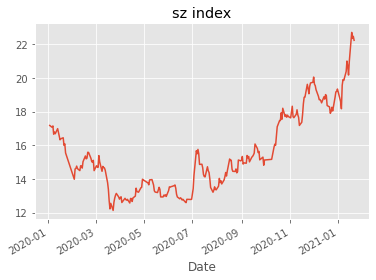

In [14]:
cnpc['Close'].plot()
plt.title('sz index')

`Pandas`允许在整个`DataFrame`对象上进行向量化数学运算。
例如根据每天收盘价返回对数收益率：


In [30]:
cnpc['Ret_Loop'] = 0.0  # pandas 添加新一列操作
for i in range(1, len(cnpc)):
    cnpc['Ret_Loop'][i] = np.log(cnpc["Close"][i]/cnpc["Close"][i-1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
cnpc[['Close', 'Ret_Loop']].tail()  # 计算结果

,Close,Ret_Loop
Date,,
2021-01-15,21.000000,0.040326
2021-01-18,22.700001,0.077843
2021-01-19,22.340000,-0.015986
2021-01-20,22.469999,0.005802
2021-01-21,22.230000,-0.010738


也可以使用向量化方法

In [33]:
%  time cnpc['Return'] = np.log(cnpc["Close"]/cnpc["Close"].shift(1))

Wall time: 573 µs


In [34]:
cnpc[['Close', 'Ret_Loop', 'Return']].tail()  # 计算结果

,Close,Ret_Loop,Return
Date,,,
2021-01-15,21.000000,0.040326,0.040326
2021-01-18,22.700001,0.077843,0.077843
2021-01-19,22.340000,-0.015986,-0.015986
2021-01-20,22.469999,0.005802,0.005802
2021-01-21,22.230000,-0.010738,-0.010738


删除列操作：

In [35]:
del cnpc['Ret_Loop']

查看`Return`与时间的图表：

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWar

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

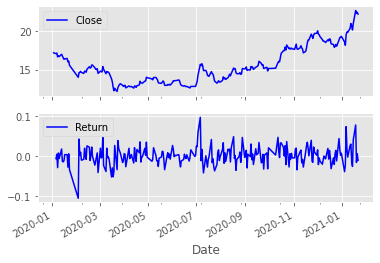

In [36]:
cnpc[['Close', 'Return']].plot(subplots=True, style='b')

利用Pandas计算滑动平均值：使用`rolling().mean()`函数
其他“滑动”函数：
1. 滑动最大值：`rolling().max()`
2. 滑动最小值：`rolling().min()`
3. 滑动相关系数：`rollin().corr()`

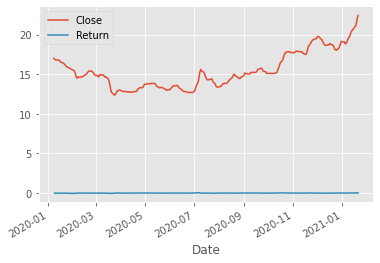

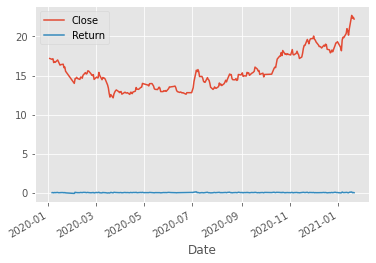

In [43]:
#  四天平均
rooling_mean= cnpc.rolling(4).mean()
rooling_mean[['Close', 'Return']].plot()
plt.show()
cnpc[['Close', 'Return']].plot()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWar

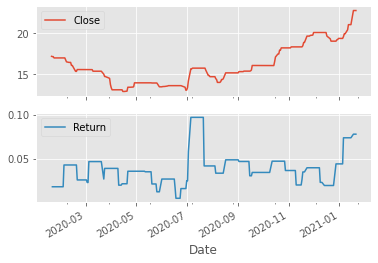

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWar

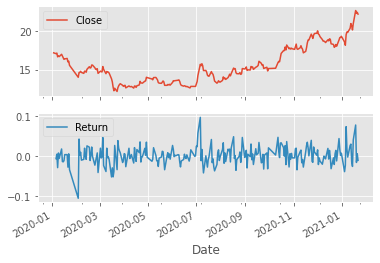

In [48]:
# 12天最大
rooling_max= cnpc.rolling(12).max()
rooling_max[['Close', 'Return']].plot(subplots=True)
plt.show()
cnpc[['Close', 'Return']].plot(subplots=True)
plt.show()

## 6.3 高频交易